# Churn Prediction

O **Churn** rate, ou simplesmente churn, representa a taxa de evasão da sua base de clientes, ou seja, número de clientes que cancelam um determinado produto ou serviço. Entender porque seus clientes abandonam sua empresa, é vital para conquistar um crescimento sustentável.

<p align="center">
  <img width="55%" src="https://image.freepik.com/vetores-gratis/programa-de-incentivo-e-bem-estar-para-retencao-de-funcionarios-construcao-da-lealdade-da-equipe-reducao-da-taxa-de-demissoes-para-talentos-importantes-chefe-segurando-ima-para-recuar-resignado-ou-deixando-o-funcionario_212586-831.jpg" alt="Churn_Prediction"height=400px >
</p>

**Churn Prediction** é uma das soluções mais eficiente oferecida pela **Big Data** (Grande volume e variedade de dados), essa aplicação é realizada por meio de Machine Learning, método de análise de dados que faz uso automatizado de algoritimos que aprendem interativamente e encontram insights, a partir da analise da rotatividade da base de usuários propensos a desistir do que se oferece no mercado, para promover ações direcionadas para tentar reter tais clientes.

Pontos que iremos abordar nesse projeto:

* Aquisição dos dados
* Analise Exploratória dos Dados
* Preparar os Dados
* Modelo de Machine Learning
* 

## Aquisição dos Dados

Os dados utilizado nesse projeto foram originalmente disponibilizado na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), e tratam de um problema típico de uma empresa de telecomunicação.

Cada linha representa um cliente, e cada coluna os atributos do cliente, o conjunto de dados inclui informações como:

* Clientes que saíram no ultimo mês.
* Serviços que cada cliente assinou.
* Informações da conta do cliente.
* Informações demográficas.

Os nomes das colunas, são bem claras, e permite o entendimento a respeito do problema.

In [1]:
# importando pacotes necessarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

# warnings filter
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# importando dados
DATA_PATH = 'https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(DATA_PATH)

# Dimensoes do Dataset
print('Dimenssões do Dataset: \n',
     'Números de Variaveis: ', df.shape[1], '\n',
     'Números de Linhas: ',df.shape[0])

Dimenssões do Dataset: 
 Números de Variaveis:  21 
 Números de Linhas:  7043


## Analise Exploratória dos Dados

Para uma melhor analise de como os dados estão distribuído em nosso Dataset, foi criado um **Dicionário de Variáveis:**

* `customerID` - Identificação do Cliente.
* `gender` - Género, se o Cliente é homem ou mulher.
* `SeniorCitizen` - Se o Cliente é idoso (0 = não, 1 = sim).
* `Partner` - Se o Cliente tem um parceiro, sim ou não.
* `Dependents` - Se o Cliente possui dependentes, sim ou não.
* `tenure` - Posse, número de meses que o Cliente permaneceu na empresa.
* `PhoneService` - Se o Cliente tem serviço de telefone.
* `MultipleLines` - Se o Cliente tem várias linhas (Sim, Não, Sem serviço de telefone).
* `InternetService` - Serviço de internet (DSL, fibra óptica, Não).
* `OnlineSecurity` - Se o Cliente tem segurança online, ou não.
* `OnlineBackup` - Se o Cliente tem serviço de backup online, ou não.
* `DeviceProtection` - Se o Cliente tem proteção de dispositivo, ou não.
* `TechSupport` - Se o Cliente tem suporte técnico, ou não.
* `StreamingTV` - Se o Cliente tem streaming de TV, ou não.
* `StreamingMovies` - Se o Cliente possui streaming de filmes, ou não.
* `Contract` - A vigência do contrato do Cliente ( mês a mês, um ano, dois anos). 
* `PaperlessBilling` - Se o Cliente tem faturamento em papel, ou não.
* `PaymentMethod` - O método de pagamento do Cliente.
* `MonthlyCharges` - O valor cobrado do Cliente mensalmente.
* `TotalCharges` - O valor total cobrado do Cliente.
* `Churn` - Se o Cliente abandonou a empresa, ou não.

A baixo a visualização das 5 primeiras e ultimas linhas, já permite entender como o dataset está composto. Como verificado, o dataset está composto por 7043 linhas, e 21 colunas.

In [2]:
# Lendo as 5 primeiras linhas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Lendo as ultimas linhas do Dataset
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


A coluna `customerID` é a identificação do cliente na base de dados, em nossa analise, não terá valor nenhum, por isso será removido de nosso dataset.

In [4]:
# Removendo a coluna  customerID
df.drop(columns=['customerID'], inplace=True)

Gerando informações de nosso dataset, de uma forma resumida, mostra nomes das variáveis, quantidade de linhas e colunas, tipo da variável, e podemos perceber, que nessa saída não mostra valores ausentes.

In [5]:
# Informacoes do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Como tinha comentado a cima, nesse comando mostra 0% de valores ausentes, mas precisamos ficar atentos, mesmo não detectando nenhum valor ausentes, existem strings que representam sim, valores ausentes.

* A colunas `TotalCharges` deveria ser um **float**, mas está como uma **string**.

In [6]:
# Identificar se tem valores ausentes (porcentagem)
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)

gender              0.0
SeniorCitizen       0.0
TotalCharges        0.0
MonthlyCharges      0.0
PaymentMethod       0.0
PaperlessBilling    0.0
Contract            0.0
StreamingMovies     0.0
StreamingTV         0.0
TechSupport         0.0
DeviceProtection    0.0
OnlineBackup        0.0
OnlineSecurity      0.0
InternetService     0.0
MultipleLines       0.0
PhoneService        0.0
tenure              0.0
Dependents          0.0
Partner             0.0
Churn               0.0
dtype: float64

Para se ter uma melhor visualização, foi um criado um dataframe separando por tipo de variável (`Int`, `Object`, `Float`).

In [7]:
# Separar por tido de variavel
var_int = pd.DataFrame(df.select_dtypes(include='int').columns,columns=['Tipo Int'])
var_object = pd.DataFrame(df.select_dtypes(include='object').columns,columns=['Tipo Object'])
var_float = pd.DataFrame(df.select_dtypes(include='float').columns,columns=['Tipo Float'])

# Criar um dataframe vazio, e adicionar as colunas
df_var = pd.DataFrame()
df_var = df_var.append([var_int,var_object, var_float])

# Listar dataframe resumido com as variaveis
df_var

,Tipo Int,Tipo Object,Tipo Float
0,SeniorCitizen,NaN,NaN
1,tenure,NaN,NaN
0,NaN,gender,NaN
1,NaN,Partner,NaN
2,NaN,Dependents,NaN
3,NaN,PhoneService,NaN
4,NaN,MultipleLines,NaN
5,NaN,InternetService,NaN
6,NaN,OnlineSecurity,NaN
7,NaN,OnlineBackup,NaN


Quando tentamos converter as string da coluna `TotalCharges`, recebemos um erro, o que acontece, que o suposto dado ausente, foram lançado como strings " ", um espaço em branco, que se refere a um caractere invisível.

Listando todas as linhas com valores em string " ", referente a variável `TotalCharges`, total de 11 linhas.

In [8]:
# Listar linhas com valores em string == " "
print('Total de Linhas: ', df.TotalCharges[df.TotalCharges == ' '].shape[0])
df.loc[df.TotalCharges == ' ']

Total de Linhas:  11


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Como não é possível converter um valor string em float diretamente, vamos alterar todos os campos com string " " da variável `TotalCharge`, para o valor numérico 0, que não irá alterar em nada o nosso resultado final.

Após alterar os campos, executamos o comando para converter a coluna, e listando o nosso tipo que ficou a coluna.

In [9]:
# Alterando os valores com " " para 0
df.TotalCharges = df.TotalCharges.replace(" ", 0)

# Convertendo coluna TotalCharges para float
df.TotalCharges = df.TotalCharges.astype(float)

# Mostrar tipo da coluna
df.TotalCharges.dtypes

dtype('float64')

Resumo estatístico das variáveis numéricas, pelo comando `describe`, é possível ver, que não a indícios de outliers. 

In [10]:
# ver o resumo estatistico da variaveis numericas
df.describe().round(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.00,7043.00,7043.00,7043.00
mean,0.16,32.37,64.76,2279.73
std,0.37,24.56,30.09,2266.79
min,0.00,0.00,18.25,0.00
25%,0.00,9.00,35.50,398.55
50%,0.00,29.00,70.35,1394.55
75%,0.00,55.00,89.85,3786.60
max,1.00,72.00,118.75,8684.80


Analisando gráfico `boxplot` para as colunas `MonthlyCharges` e `TotalCharges`, se percebe uma distribuição de valores, reforçando a hipótese das analise estatística, não acusou nenhum plot fora dos limites superior ou inferior.

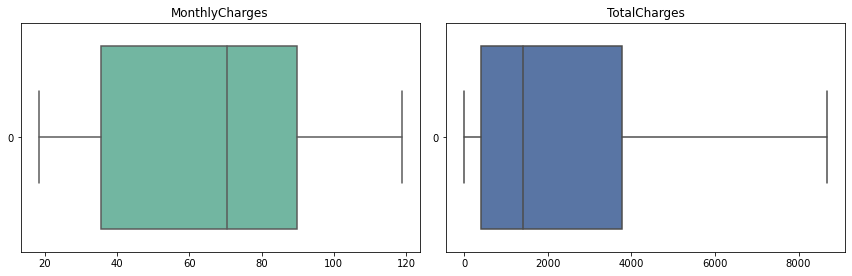

In [11]:
# Boxplot
fig, ax = plt.subplots(nrows=1, ncols=2 ,figsize=(12,4))
sns.set_theme(style='whitegrid')
sns.boxplot(data=df['MonthlyCharges'], orient='h', palette='Set2', ax=ax[0]).set(title='MonthlyCharges')
sns.boxplot(data=df['TotalCharges'], orient='h', ax=ax[1]).set(title='TotalCharges')

plt.tight_layout();

Vamos analisar o histograma das variáveis numéricas, com o intuito de extrair alguns insights.

Como pode ser analisado a partir dos histograma:

* Se percebe que o `Churn`, tem diretamente relação ao valor cobrado pelos serviços / produtos.
* Os clientes abandonam a empresa, logo nos primeiros meses.
* Quanto mas tempo uma pessoa for consumidora da empresa, maior a taxa de retenção do cliente.

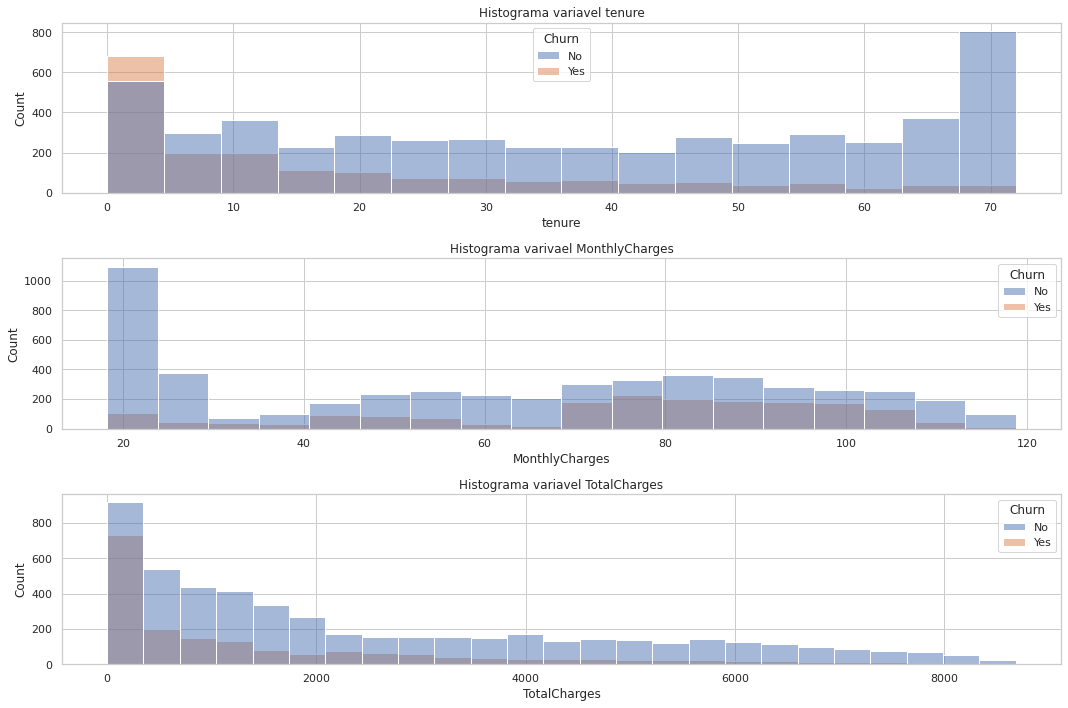

In [12]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15,10))

sns.histplot(data=df, x = 'tenure', ax=ax[0], hue = 'Churn')
ax[0].set_title('Histograma variavel tenure')

sns.histplot(data=df, x = 'MonthlyCharges', ax=ax[1], hue = 'Churn')
ax[1].set_title('Histograma varivael MonthlyCharges')

sns.histplot(data=df, x = 'TotalCharges', ax=ax[2], hue = 'Churn')
ax[2].set_title('Histograma variavel TotalCharges')

plt.tight_layout()

Um plot que faz a contagem dos valores de nossa variável alvo `Churn`, conta quantos valores Yes ou No Churn, sendo 26.54% de YES Churn.

Como vemos no gráfico, fica claro que os dados estão desbalanceados, isso gera um problema durante a predição do modelo de Machine Learning, é mais fácil classificar a maioria como `No Churn`, diante disso, será necessário balancear a amostra, será feito na sequência.

No     5174
Yes    1869
Name: Churn, dtype: int64


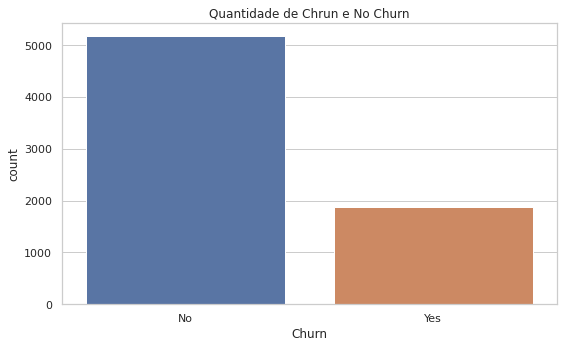

In [13]:
# contagem de valores
fig, ax = plt.subplots(figsize=(8,5))
print(pd.Series(df.Churn).value_counts())
sns.countplot(df.Churn)
ax.set_title("Quantidade de Chrun e No Churn")
plt.tight_layout();

In [14]:
# porcentagem de Yes Churn
churn_porcent = round((df.Churn.value_counts()[1] / df.shape[0]) * 100,2)
print('Porcentagem de YES Churn: {}%'.format(churn_porcent))

Porcentagem de YES Churn: 26.54%


## Preparar os Dados

Em muitas abordagem de machine learning e ciências de dados, o conjunto de dados pode conter textos, ou valores categóricos, ou seja, valores não numéricos.

Usando Label-Encoding, da biblioteca do Scikit-Learn, para transformar as variáveis binárias em valores de 0 e 1, esse tipo de abordagem, requer que a coluna seja do tipo 'category', iremos pegar as variáveis que contem 2 labels únicos, incluindo a variável algo `Churn`, na sequência serão separados as variáveis numéricas da categóricas.

As variáveis categóricas, serão transformadas em variáveis `dummy`. O recurso `dummys` devem ser utilizados sempre que desejamos incluir variáveis categóricas em modelos que aceitam apenas variáveis numéricas.

In [15]:
# Colunas que contem 2 labels unicos
binary_var = df.nunique()[df.nunique() == 2]
binary_var

gender              2
SeniorCitizen       2
Partner             2
Dependents          2
PhoneService        2
PaperlessBilling    2
Churn               2
dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder

bin_var = df.nunique()[df.nunique() == 2].keys().tolist()
num_var = [col for col in df.select_dtypes(['int','float']).columns.tolist() if col not in bin_var]
cat_var = [col for col in df.columns.tolist() if col not in bin_var + num_var]

# criar uma copia do dataframe
df_trat = df.copy()

# criando instancia de labelencoder
le = LabelEncoder()
for i in bin_var:
    df_trat[i] = le.fit_transform(df_trat[i])

# Encoding para variavel numerica
df_trat = pd.get_dummies(df_trat, columns=cat_var)

# Ver as primeiras linha do novo dataframe
df_trat.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


## Modelo Machine Learning

Com o processamento de preparar os dados realizado ma etapa anterior, os dados já podem ser usados nos modelos de Machine Learing.

Já de inicio, iremos separar os dados que serão usados para treino e teste, os dados de teste, com as variáveis X (variáveis independentes), e y (Churn - variável alvo).

In [17]:
# Definindo os valores de x e y
X = df_trat.drop('Churn', axis=1)
y = df_trat['Churn']

# Dividindo os dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y)

print('X Train:', X_train.shape)
print('X Test:', X_test.shape)
print('Y Train:', y_train.shape)
print('Y Test', y_test.shape)
print('DF original:', df_trat.shape)
print('--------------------------------')

X Train: (5282, 40)
X Test: (1761, 40)
Y Train: (5282,)
Y Test (1761,)
DF original: (7043, 41)
--------------------------------


### Balanceamento dos dados

Como já analisado a cima, foi identificado dados desbalanceados na variável Churn, os **Dados Desbalanceados** podem ser definidos pela pequena incidência de uma categoria dentro da base de um dataset, a classe minoritária, em comparação com as demais categorias, a classe majoritárias. 

Vamos utilizar técnica de **Under-sampling** para balancear os dados, reduz o desbalanceamento do dataset, focando na classe majoritária. 

0    1393
1    1393
Name: Churn, dtype: int64
--------------------------------
1 = Yes Churn
0 = No Churn
--------------------------------


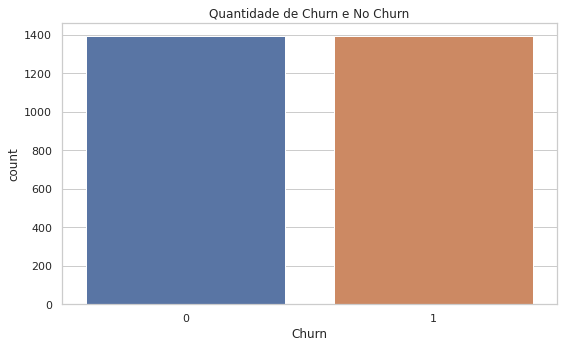

In [18]:
# classificacao de classes desabalanceadas
from imblearn.under_sampling import RandomUnderSampler

# tecnica para balanceamento de dados under-sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# ver o balanceamento do Churn
print(pd.Series(y_rus).value_counts())
print('--------------------------------')
print('1 = Yes Churn')
print('0 = No Churn')
print('--------------------------------')

# plotar a nova distribuicao do Churn
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(y_rus)
ax.set_title('Quantidade de Churn e No Churn')
plt.tight_layout()

### Regressão Logística

Após balancear os dados, vamos usar a técnica de Regressão Logística, é um recurso que nos permite estimar a probabilidade associadas a ocorrência de determinado evento em face de um conjunto de face exploratória.

In [19]:
# instanciar modelo
model = LogisticRegression()

# padronizar os dados de treino
scaler = StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)

# fit do modelo (treinar)
model.fit(X_train, y_train)

# Previsao em cima do novos dados
# Padronizar os dados de teste
X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)

# imprimir relatorio
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.65      0.76      1285
           1       0.48      0.86      0.61       476

    accuracy                           0.71      1761
   macro avg       0.70      0.75      0.69      1761
weighted avg       0.80      0.71      0.72      1761



/home/thiago/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### XGBoost

O nome XGBoost vem de eXtreme Gradient Boosting e é pertencente à classe das árvores de decisão. Este algoritmo vem se destacado nas competições do Kaggle, sendo considerado como melhor opção para diversos tipos de problema.

In [20]:
from xgboost import XGBClassifier

# instancia e escolher hyperparameters
model_xgboost = XGBClassifier()

# Fit modelo treinar
model_xgboost.fit(X_train, y_train)

# Fazendo previsao em cima dos novos dados
y_pred_xgb = model_xgboost.predict(X_test)

# performanse do algoritimo
print('Acuracy Score')
print(accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

/home/thiago/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:38:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Acuracy Score
0.7228847245883021
              precision    recall  f1-score   support

           0       0.88      0.72      0.79      1285
           1       0.49      0.74      0.59       476

    accuracy                           0.72      1761
   macro avg       0.69      0.73      0.69      1761
weighted avg       0.78      0.72      0.74      1761



### Decision Tree

Decision Tree, ou árvore de decisão, é um algoritimo de aprendizado de máquina supervisionado para machine learning.

In [21]:
from sklearn.tree import DecisionTreeClassifier

# instanciar modelo
model_decisiont = DecisionTreeClassifier()

# fit modelo treinar
model_decisiont.fit(X_train, y_train)

# Fazer previsao em cima dos novos dados
y_pred_decisiont = model_decisiont.predict(X_test)

# performanse do algoritimo
print('Acuracy Score')
print(accuracy_score(y_test, y_pred_decisiont))
print(classification_report(y_test, y_pred_decisiont))

Acuracy Score
0.4457694491766042
              precision    recall  f1-score   support

           0       0.78      0.33      0.47      1285
           1       0.29      0.75      0.42       476

    accuracy                           0.45      1761
   macro avg       0.54      0.54      0.44      1761
weighted avg       0.65      0.45      0.46      1761



Matriz de confusão 

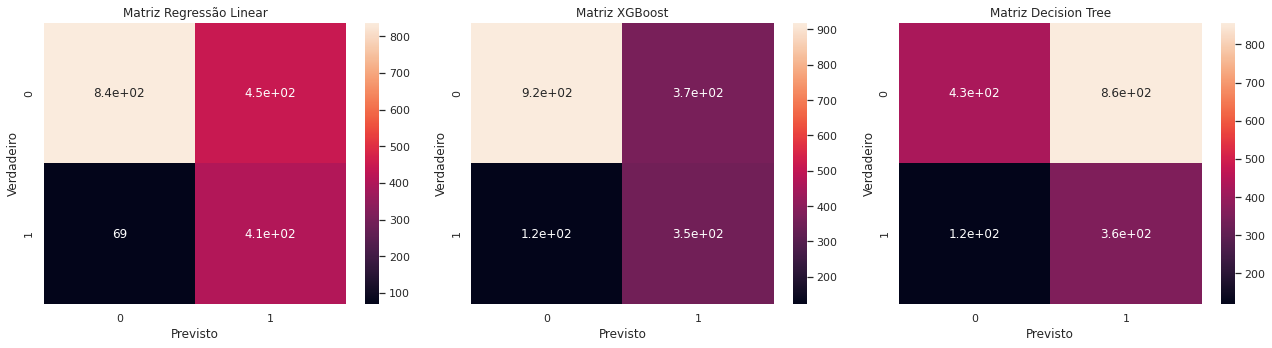

In [35]:
# Matriz de confusao modelos
fig,ax = plt.subplots(figsize=(18,5), nrows=1, ncols=3)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax[0])
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, ax=ax[1])
sns.heatmap(confusion_matrix(y_test, y_pred_decisiont), annot=True, ax=ax[2])

ax[0].set_title('Matriz Regressão Linear')
ax[0].set_ylabel('Verdadeiro')
ax[0].set_xlabel('Previsto')

ax[1].set_title('Matriz XGBoost')
ax[1].set_ylabel('Verdadeiro')
ax[1].set_xlabel('Previsto')

ax[2].set_title('Matriz Decision Tree')
ax[2].set_ylabel('Verdadeiro')
ax[2].set_xlabel('Previsto')

plt.tight_layout()

### Cross-Validation

In [37]:
# Cross-validation
scores = cross_val_score(model, X_train_transformed, y_train, cv=5, scoring='recall')
print('Scores', scores)
print("Recall: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std()))

Scores [0.59139785 0.53405018 0.49280576 0.54676259 0.55197133]
Recall: 0.54 (+/- 0.03)


### Grid Search

In [31]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()

# Grid Search
parameters = {
    'C' : [0.001,0.01,0.1,1,10,100,1000]
}

clf = GridSearchCV(model, parameters, scoring='recall')
clf.fit(X_train_transformed, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='recall')

In [32]:
print(clf.best_params_)
print(('Melhor: {} usando {}'.format(clf.best_score_, clf.best_params_)))

{'C': 100}
Melhor: 0.544833810371058 usando {'C': 100}


## Conclusão